# Import package and function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"

# load files 

In [3]:
os.chdir('..')
data_folder = os.getcwd()+"\\Experimental_Data_Example\\OLED_Data\\"  # Note that use absolute path on your computer instead.
BS = loadmat(data_folder+'oled_boundary_set', squeeze_me =True)
ExpData = loadmat(data_folder+'merge_0224_Checkerboard_30Hz_27_15min_Br50_Q100', squeeze_me =True)

In [4]:
cn = 9
dt = 1/60
timeBinNum = 60
Taxis = np.arange(timeBinNum)*dt

checkerboard = ExpData['bin_pos']
fs = 1.5
GFcheckerboard = np.array([gaussian_filter(cb.astype(float), fs) for cb in checkerboard])
GFCcheckerboard = GFcheckerboard - np.mean(GFcheckerboard, axis = 0)
rstate, _ = np.histogram(ExpData['reconstruct_spikes'][cn-1], np.arange(len(checkerboard)+1)*dt)

In [5]:
STK = np.zeros([timeBinNum,27,27])
for i in range(timeBinNum): #1s
    for ii in np.arange(0, len(checkerboard)-i):
        STK[i,:,:] += rstate[ii+i]*GFCcheckerboard[ii,:,:]
    STK[i,:,:] /= np.sum(rstate[:len(checkerboard)-i])

# SVD

In [6]:
rSTK = STK[:,:,:].reshape((STK.shape[0],-1))
U,sigma,VT=np.linalg.svd(rSTK)

In [7]:
sigma/np.sum(sigma)

array([0.2044324 , 0.04267267, 0.03869833, 0.03538358, 0.03426009,
       0.0327513 , 0.03103568, 0.02851325, 0.02772626, 0.02680515,
       0.02535441, 0.02429801, 0.02395232, 0.02342183, 0.02285461,
       0.02169439, 0.02008128, 0.01872769, 0.01833842, 0.01795599,
       0.01717338, 0.01586676, 0.01476995, 0.01462481, 0.01431731,
       0.01348594, 0.012993  , 0.01273973, 0.01181117, 0.01154368,
       0.01037668, 0.01001394, 0.00990732, 0.00901753, 0.00862229,
       0.00779639, 0.00731417, 0.0072177 , 0.00677231, 0.00669708,
       0.00614446, 0.00568246, 0.00544186, 0.00449965, 0.00441553,
       0.00405172, 0.00377332, 0.00346291, 0.00318466, 0.00302097,
       0.00275341, 0.0023811 , 0.0020384 , 0.00194231, 0.00157441,
       0.0011152 , 0.00103686, 0.00082638, 0.00039856, 0.00023699])

(0, 1)

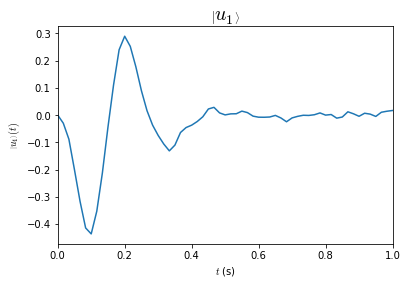

In [8]:
plt.plot(np.arange(timeBinNum+1)*dt, np.append(0,U[:,0]))
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$\left| u_1 \right\rangle(t)$')
plt.title(r'$\left| u_1 \right\rangle$', fontsize=20)
plt.xlim([0,1])

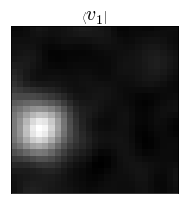

In [9]:
plt.imshow( VT[0,:].reshape((27,27)) , cmap='gray')
plt.title(r'$\left\langle {v_1} \right|$', fontsize=20)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gcf().set_size_inches(3,3.5)

# Figure 3.4: A reconstructed separable STK from SVD compared with the original STK.

In [10]:
SVDtogather =VT[0,:].reshape((27,27))* U[0,0]
STKtogather = STK[0,:,:]
for i in np.arange(1,18):
    SVDtogather = np.hstack((SVDtogather, VT[0,:].reshape((27,27)) * U[i,0] ))
    STKtogather = np.hstack((STKtogather, STK[i,:,:] ))
Togather = np.vstack((STKtogather, SVDtogather))
imshowdict = {'cmap': 'gray',
              'vmin': np.min(Togather),
              'vmax': np.max(Togather)}

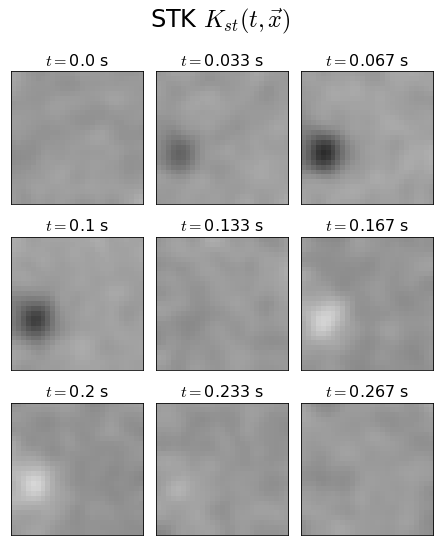

In [11]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
for i in np.arange(9):
    ax.flatten()[i].imshow(STK[i*2,:,:], **imshowdict)
    ax.flatten()[i].set_title(r'$t=$'+str(np.round((i*2)/60, 3))+' s', fontsize = 16)
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
# fig.tight_layout()
fig.suptitle(r'STK $K_{st}(t,\vec{x})$', fontsize=24)
fig.set_size_inches(6,7.5)

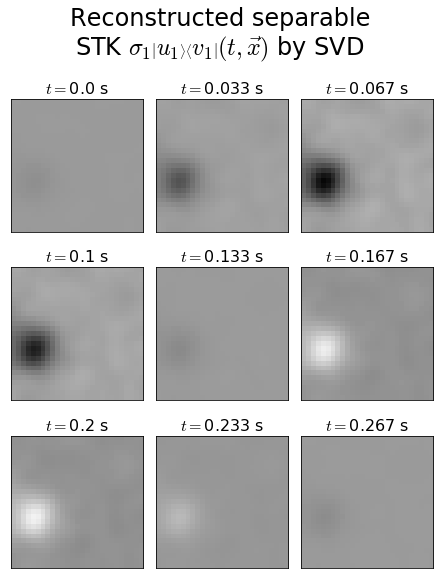

In [12]:
fig, ax = plt.subplots(3,3, constrained_layout=True)
for i in range(9):
    ax.flatten()[i].imshow(VT[0,:].reshape((27,27)) * U[i*2,0], **imshowdict)
    ax.flatten()[i].set_title(r'$t=$'+str(np.round((i)/30, 3))+' s', fontsize = 16)
    ax.flatten()[i].axes.xaxis.set_visible(False)
    ax.flatten()[i].axes.yaxis.set_visible(False)
# fig.tight_layout()
fig.suptitle('Reconstructed separable\n'+r'STK $\sigma_1 \left| u_1 \right\rangle \left\langle {v_1} \right|(t,\vec{x})$ by SVD', fontsize=24)
fig.set_size_inches(6,8)